In [204]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import kagglehub

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Лабораторная работа №3

In [205]:
path = kagglehub.dataset_download("mosapabdelghany/medical-insurance-cost-dataset")
print(path)

C:\Users\ASUS\.cache\kagglehub\datasets\mosapabdelghany\medical-insurance-cost-dataset\versions\1


## Обзор данных

In [206]:
df = pd.read_csv("C:/Users/ASUS/.cache/kagglehub/datasets/mosapabdelghany/medical-insurance-cost-dataset/versions/1/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


ОСНОВНАЯ ИНФОРМАЦИЯ О ДАТАСЕТЕ

Размер датасета: 1338 строк, 7 столбцов
Общее количество значений: 9366

--------------------------------------------------------------------------------
ТИПЫ ДАННЫХ:
--------------------------------------------------------------------------------
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

--------------------------------------------------------------------------------
ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:
--------------------------------------------------------------------------------
Пропущенных значений нет!

--------------------------------------------------------------------------------
ДУБЛИКАТЫ:
--------------------------------------------------------------------------------
Количество дублирующихся строк: 1
Процент дубликатов: 0.07%

--------------------------------------------------------------------------------
ЧИСЛОВЫЕ ПЕРЕМЕННЫЕ:
------------------

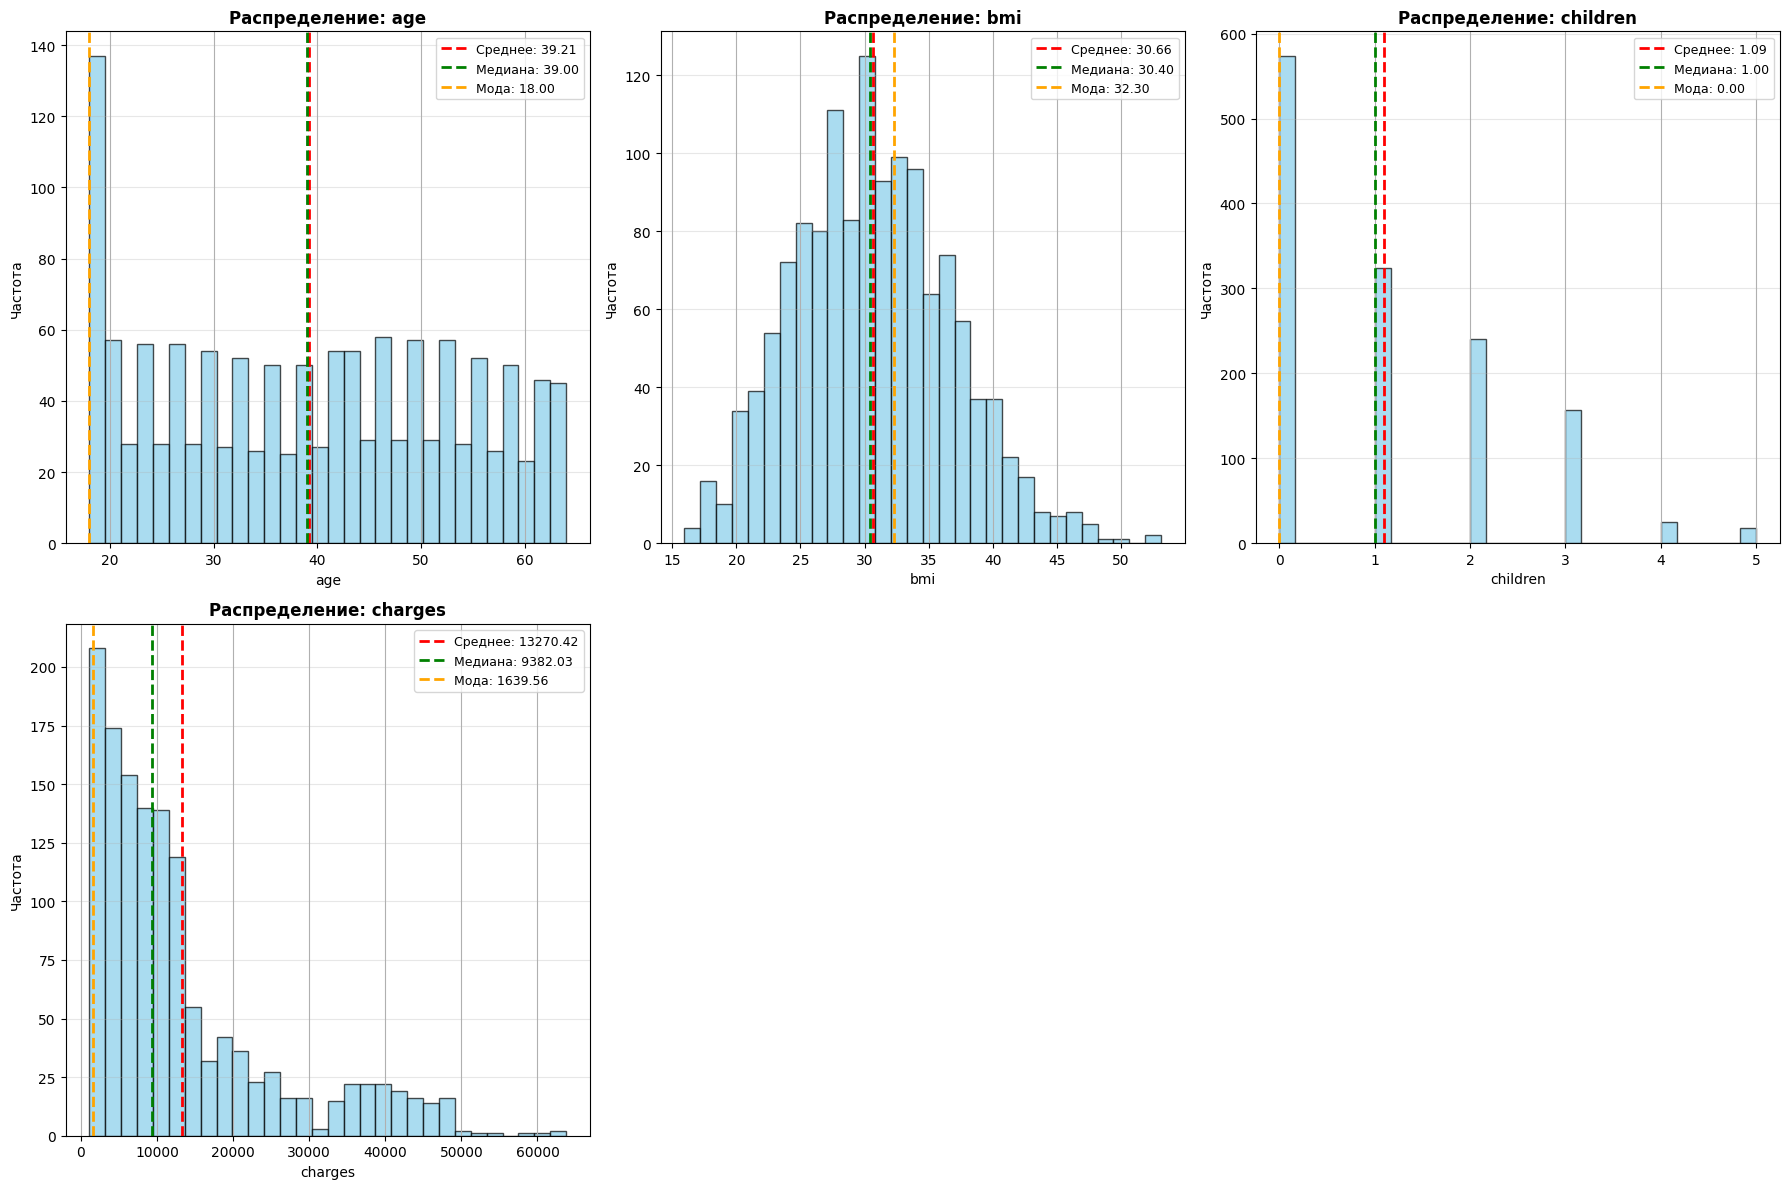

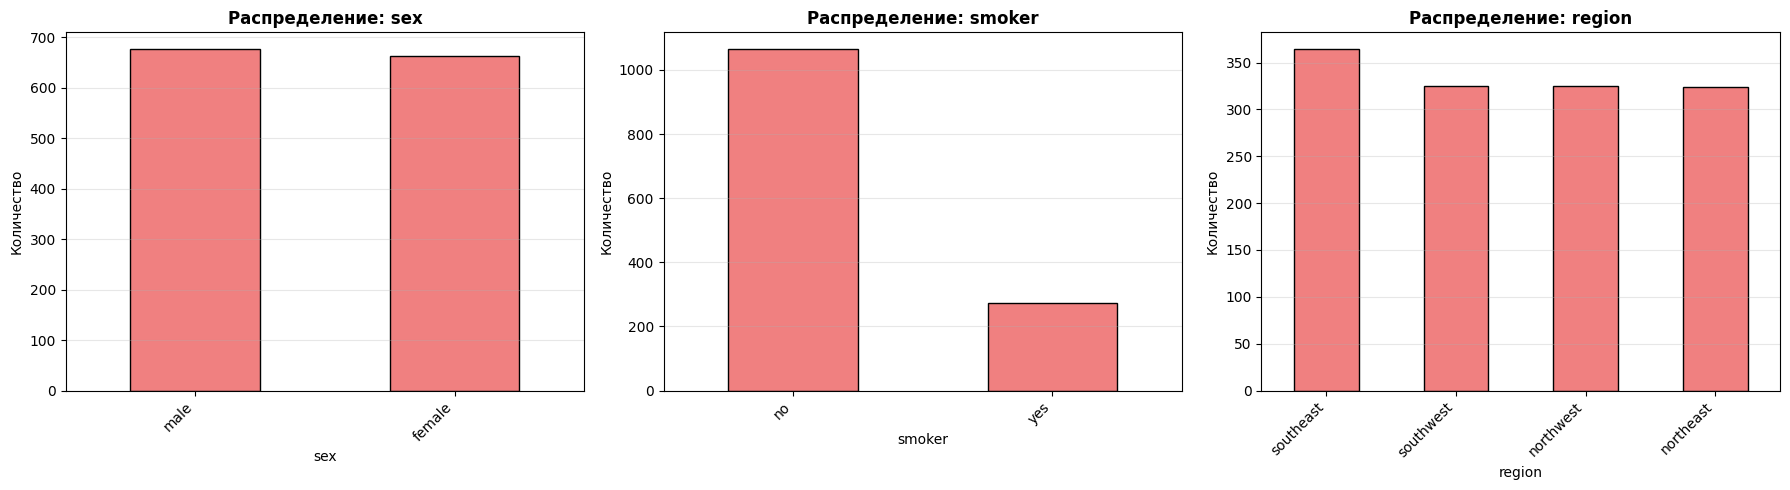

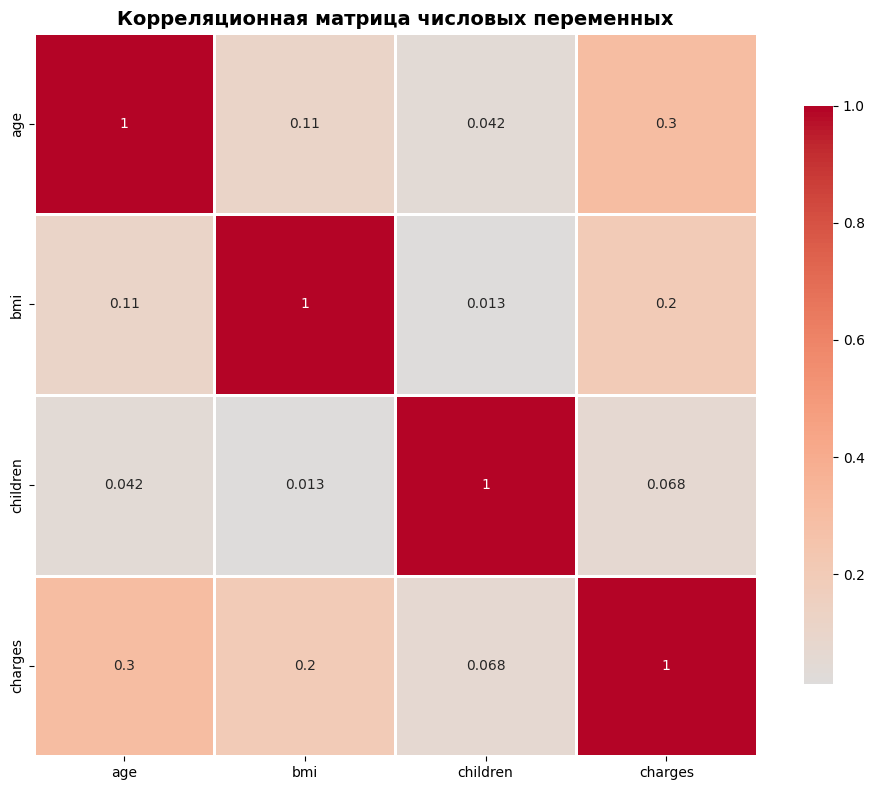

In [207]:

print("="*80)
print("ОСНОВНАЯ ИНФОРМАЦИЯ О ДАТАСЕТЕ")
print("="*80)

print(f"\nРазмер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
print(f"Общее количество значений: {df.size}")


print("\n" + "-"*80)
print("ТИПЫ ДАННЫХ:")
print("-"*80)
print(df.dtypes)

print("\n" + "-"*80)
print("ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:")
print("-"*80)
missing = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Пропусков': missing,
    'Процент': missing_percent
})
print(missing_df[missing_df['Пропусков'] > 0] if missing_df['Пропусков'].sum() > 0 else "Пропущенных значений нет!")

print("\n" + "-"*80)
print("ДУБЛИКАТЫ:")
print("-"*80)
duplicates = df.duplicated().sum()
print(f"Количество дублирующихся строк: {duplicates}")
print(f"Процент дубликатов: {(duplicates/len(df)*100):.2f}%")

print("\n" + "-"*80)
print("ЧИСЛОВЫЕ ПЕРЕМЕННЫЕ:")
print("-"*80)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Количество числовых переменных: {len(numeric_cols)}")
print(f"Список: {numeric_cols}")
print("\nСтатистика:")
print(df[numeric_cols].describe())

print("\n" + "-"*80)
print("КАТЕГОРИАЛЬНЫЕ ПЕРЕМЕННЫЕ:")
print("-"*80)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Количество категориальных переменных: {len(categorical_cols)}")
print(f"Список: {categorical_cols}")
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Уникальных значений: {df[col].nunique()}")
    print(f"  Значения: {df[col].unique()}")
    print(f"  Распределение:")
    print(df[col].value_counts())


n_numeric = len(numeric_cols)
n_categorical = len(categorical_cols)
n_cols = 3
n_rows_numeric = (n_numeric + n_cols - 1) // n_cols
n_rows_categorical = (n_categorical + n_cols - 1) // n_cols


if n_numeric > 0:
    fig1 = plt.figure(figsize=(18, 6 * n_rows_numeric))
    
    for idx, col in enumerate(numeric_cols, start=1):
        ax = plt.subplot(n_rows_numeric, n_cols, idx)
        
     
        df[col].hist(bins=30, edgecolor='black', color='skyblue', alpha=0.7)
        
 
        mean_val = df[col].mean()
        median_val = df[col].median()
        mode_val = df[col].mode()[0] if not df[col].mode().empty else mean_val
        

        plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_val:.2f}')
        plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Медиана: {median_val:.2f}')
        plt.axvline(mode_val, color='orange', linestyle='--', linewidth=2, label=f'Мода: {mode_val:.2f}')
        
        plt.title(f'Распределение: {col}', fontsize=12, fontweight='bold')
        plt.xlabel(col, fontsize=10)
        plt.ylabel('Частота', fontsize=10)
        plt.legend(loc='best', fontsize=9)
        plt.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

if n_categorical > 0:
    fig2 = plt.figure(figsize=(18, 5 * n_rows_categorical))
    
    for idx, col in enumerate(categorical_cols, start=1):
        ax = plt.subplot(n_rows_categorical, n_cols, idx)
        value_counts = df[col].value_counts()
        value_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
        plt.title(f'Распределение: {col}', fontsize=12, fontweight='bold')
        plt.xlabel(col, fontsize=10)
        plt.ylabel('Количество', fontsize=10)
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

if len(numeric_cols) > 1:
    fig3 = plt.figure(figsize=(10, 8))
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Корреляционная матрица числовых переменных', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


## Задание 1

### Проверка пропусков

In [208]:
print(df.columns.tolist())
print(df.isna().sum())

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### Проверка выбросов

In [209]:
def find_outliers(df, columns=None):

    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns
    
    outliers_info = {}
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        outliers_info[col] = {
            'count': len(outliers),
            'indices': outliers.index.tolist(),
            'values': outliers[col].tolist(),
            'bounds': (lower_bound, upper_bound)
        }
    
    return outliers_info

АНАЛИЗ ВЫБРОСОВ (метод IQR)

ДЕТАЛЬНАЯ ИНФОРМАЦИЯ:
--------------------------------------------------------------------------------

age:
  Границы: [-9.00, 87.00]
  Количество выбросов: 0 (0.00%)

bmi:
  Границы: [13.70, 47.29]
  Количество выбросов: 9 (0.67%)
  Минимальный выброс: 47.41
  Максимальный выброс: 53.13
  Среднее значение выбросов: 49.28

children:
  Границы: [-3.00, 5.00]
  Количество выбросов: 0 (0.00%)

charges:
  Границы: [-13109.15, 34489.35]
  Количество выбросов: 139 (10.39%)
  Минимальный выброс: 34617.84
  Максимальный выброс: 63770.43
  Среднее значение выбросов: 42103.95


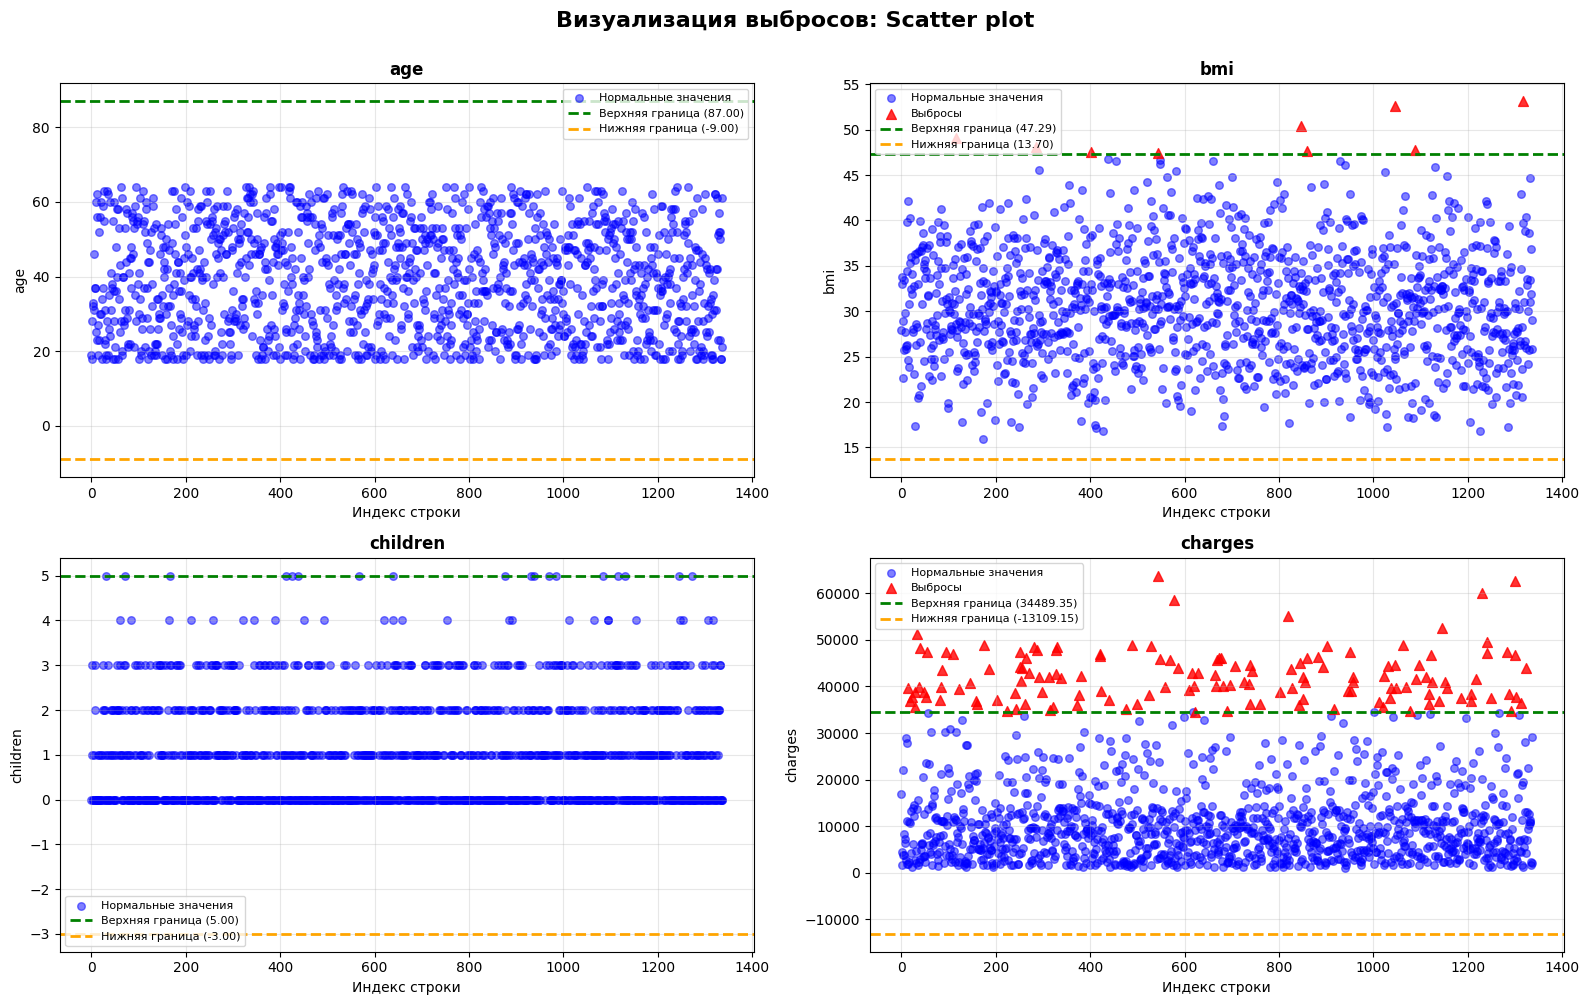

In [210]:

print("="*80)
print("АНАЛИЗ ВЫБРОСОВ (метод IQR)")
print("="*80)

outliers_info = find_outliers(df)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("\nДЕТАЛЬНАЯ ИНФОРМАЦИЯ:")
print("-"*80)
for col in numeric_cols:
    info = outliers_info[col]
    count = info['count']
    percent = (count / len(df)) * 100
    lower, upper = info['bounds']
    
    print(f"\n{col}:")
    print(f"  Границы: [{lower:.2f}, {upper:.2f}]")
    print(f"  Количество выбросов: {count} ({percent:.2f}%)")
    
    if count > 0:
        values = info['values']
        print(f"  Минимальный выброс: {min(values):.2f}")
        print(f"  Максимальный выброс: {max(values):.2f}")
        print(f"  Среднее значение выбросов: {np.mean(values):.2f}")

# Расчет количества строк и столбцов для визуализации
n_numeric = len(numeric_cols)
n_cols_plot = 2
n_rows_plot = (n_numeric + n_cols_plot - 1) // n_cols_plot

fig2 = plt.figure(figsize=(16, 5 * n_rows_plot))
fig2.suptitle('Визуализация выбросов: Scatter plot', fontsize=16, fontweight='bold', y=1.0)

for idx, col in enumerate(numeric_cols, start=1):
    ax = plt.subplot(n_rows_plot, n_cols_plot, idx)
    
    info = outliers_info[col]
    outlier_indices = info['indices']
    lower, upper = info['bounds']
    
    normal_mask = ~df.index.isin(outlier_indices)
    outlier_mask = df.index.isin(outlier_indices)
    
    ax.scatter(df[normal_mask].index, df[normal_mask][col], 
              c='blue', alpha=0.5, s=30, label='Нормальные значения')
    
    if outlier_mask.sum() > 0:
        ax.scatter(df[outlier_mask].index, df[outlier_mask][col], 
                  c='red', alpha=0.8, s=50, marker='^', label='Выбросы')
    
    ax.axhline(y=upper, color='green', linestyle='--', linewidth=2, label=f'Верхняя граница ({upper:.2f})')
    ax.axhline(y=lower, color='orange', linestyle='--', linewidth=2, label=f'Нижняя граница ({lower:.2f})')
    
    ax.set_xlabel('Индекс строки', fontsize=10)
    ax.set_ylabel(col, fontsize=10)
    ax.set_title(f'{col}', fontsize=12, fontweight='bold')
    ax.legend(loc='best', fontsize=8)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

#### Почему не удаляем выбросы:

**Charges:** Это целевая переменная, которую  пытаемся предсказать. Если их удалить, модель вообще не сможет предсказывать дорогие случаи.

**BMI:** Высокие значения BMI (больше 40) - это реальные люди с ожирением, а не ошибки в данных. Как раз у таких людей обычно больше проблем со здоровьем, поэтому их страховка дороже. Если удалить эти данные, модель может не понять связь между лишним весом и стоимостью страховки. К тому же выбросы несильные

### Кодирование нечисловых признаков

In [211]:
gender_map = {'male': 1, 'female': 0}
df['sex'] = df['sex'].map(gender_map)

In [212]:
smoker_map = {'yes': 1, 'no': 0}
df['smoker'] = df['smoker'].map(smoker_map)

In [213]:
region_one_hot_encoded_map = pd.get_dummies(df['region'], drop_first=True).astype(int)
df = pd.concat([df, region_one_hot_encoded_map], axis=1)
df.drop(columns=['region'], inplace=True)

In [214]:
df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


### Матрица корреляций

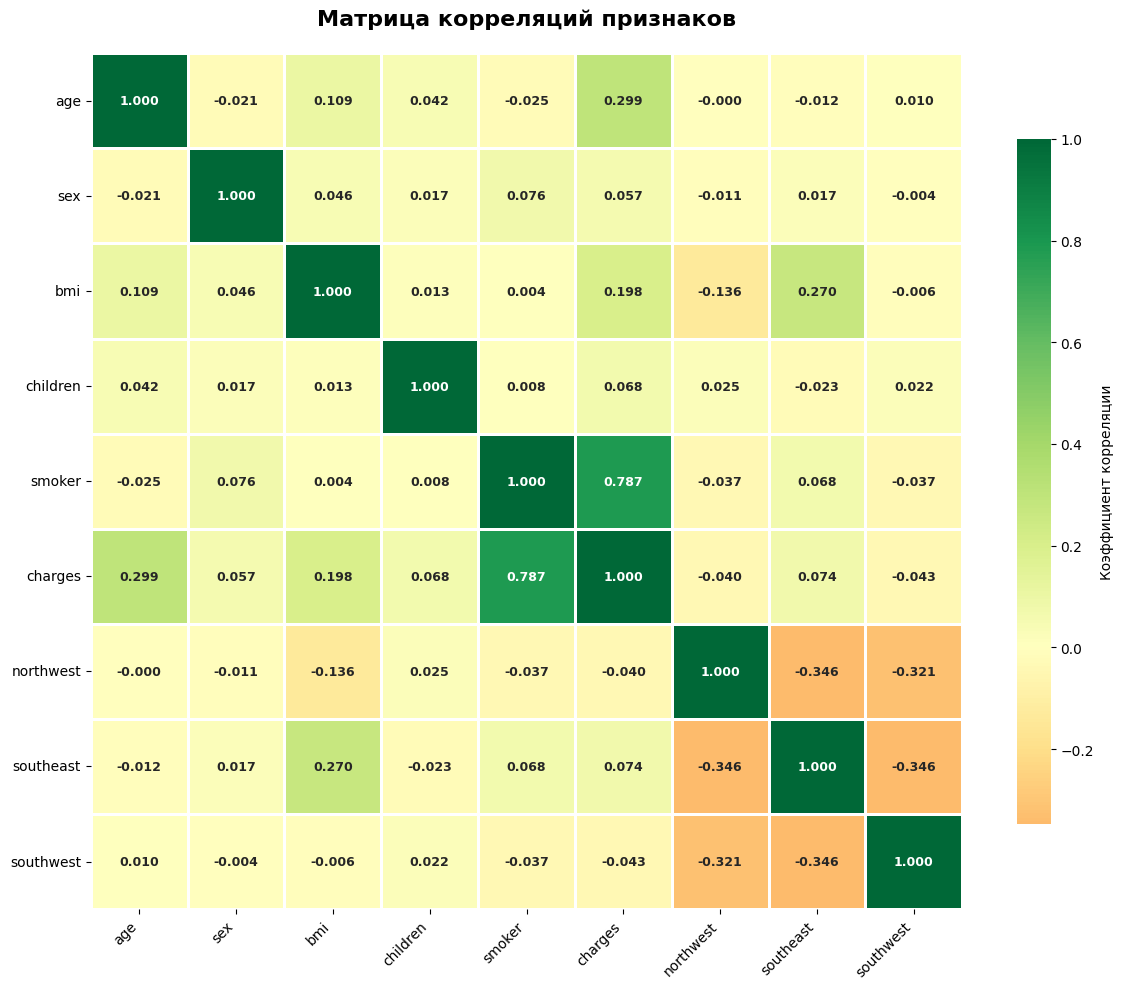


ТОП-5 признаков с наибольшей корреляцией с charges:
1. smoker         : +0.7873 (прямая)
2. age            : +0.2990 (прямая)
3. bmi            : +0.1983 (прямая)
4. southeast      : +0.0740 (прямая)
5. children       : +0.0680 (прямая)


In [215]:

correlation_matrix = df.corr()

fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(correlation_matrix, 
            annot=True,                    
            cmap='RdYlGn',                 
            center=0,                                         
            fmt='.3f',                    
            linewidths=1,                  
            linecolor='white',             
            cbar_kws={"shrink": 0.8,       
                      "label": "Коэффициент корреляции"},
            annot_kws={"size": 9,          
                       "weight": "bold"})  

plt.title('Матрица корреляций признаков', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("ТОП-5 признаков с наибольшей корреляцией с charges:")
print("="*60)
charges_corr = correlation_matrix['charges'].drop('charges').abs().sort_values(ascending=False)
for idx, (feature, corr_value) in enumerate(charges_corr.head(5).items(), 1):
    actual_corr = correlation_matrix['charges'][feature]
    direction = "прямая" if actual_corr > 0 else "обратная"
    print(f"{idx}. {feature:15s}: {actual_corr:+.4f} ({direction})")
print("="*60)

## Задания 2/3

In [216]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['charges']), df['charges'], test_size=0.2, random_state=42)

In [217]:
y_train.shape[0], y_test.shape[0]

(1070, 268)

In [218]:
def get_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    
    return {
        'MSE': mse,
        'RMSE': np.sqrt(mse),
        'MAE': mae,
        'R2': r2,
    }

### Аналитическое решение

Аналитическое решение позволяет найти оптимальные веса модели напрямую, без итераций, используя матричные операции.

#### Обычная линейная регрессия

Функционал потерь:
$$Q(w) = ||Xw - y||^2 \rightarrow \min_{w}$$

Решение:
$$w^* = (X^TX)^{-1}X^Ty$$

**Когда возникает проблема**: матрица $X^TX$ может быть вырожденной. В этом случае используется псевдообратная матрица $(X^TX)^+$.

#### L2 регуляризация

Добавляем штраф за большие веса:
$$Q_{L_2}(w) = ||Xw - y||^2 + \alpha ||w||_2^2 \rightarrow \min_{w}$$

Решение:
$$w^* = (X^TX + \alpha I)^{-1}X^Ty$$

где $\alpha$ — параметр регуляризации, $I$ — единичная матрица.

**Преимущества**: матрица $(X^TX + \alpha I)$ всегда обратима, веса модели становятся меньше и более стабильными, что помогает бороться с переобучением.

In [219]:
def linreg_analytical(X, y, l2=False, alpha=1.0, fit_intercept=True):
    X = np.array(X, dtype=float)
    y = np.array(y, dtype=float)
    
    if fit_intercept:
        X = np.column_stack([np.ones(X.shape[0], dtype=float), X])
        X = np.array(X, dtype=float)
    
    try:
        if l2:
            identity_matrix = np.eye(X.shape[1], dtype=float)
            
            if fit_intercept:
                identity_matrix[0, 0] = 0
            
            w = np.linalg.inv(X.T @ X + alpha * identity_matrix) @ X.T @ y
            
        else:
            w = np.linalg.inv(X.T @ X) @ X.T @ y
            
    except np.linalg.LinAlgError:
        print("Нельзя найти обратную матрицу, используем псевдообратную")
        if l2:
            identity_matrix = np.eye( X.shape[1], dtype=float)
            if fit_intercept:
                identity_matrix[0, 0] = 0
            w = np.linalg.pinv(X.T @ X + alpha * identity_matrix) @ X.T @ y
        else:
            w = np.linalg.pinv(X.T @ X) @ X.T @ y

    y_pred = X @ w
    
    
    metrics = get_metrics(y, y_pred)
    return w, metrics

In [220]:
def predict(X, w, fit_intercept=True):
    X = np.array(X, dtype=float)
    if fit_intercept:
        X = np.column_stack([np.ones(X.shape[0], dtype=float), X])
        X = np.array(X, dtype=float)
    return X @ w

In [221]:
def visualize_model_coefficients(w, X_train):

    feature_names = ['Intercept'] + X_train.columns.tolist()
    coefficients_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': w
    })

    print("Коэффициенты модели:")
    print(coefficients_df.to_string(index=False))
    print()

    coef_no_intercept = coefficients_df[coefficients_df['Feature'] != 'Intercept'].copy()
    
    coef_no_intercept['Abs_Coefficient'] = coef_no_intercept['Coefficient'].abs()
    coef_sorted = coef_no_intercept.sort_values('Abs_Coefficient', ascending=True)
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    bars = ax.barh(coef_sorted['Feature'], coef_sorted['Abs_Coefficient'],
                   color='steelblue', alpha=0.7, edgecolor='navy', linewidth=1.2)
    
  
    for i, (idx, row) in enumerate(coef_sorted.iterrows()):
        value = row['Abs_Coefficient']
        ax.text(value, i, f' {value:.2f}', 
                va='center', fontsize=10, fontweight='bold', color='white')
    
    ax.set_xlabel('Абсолютное значение коэффициента', fontsize=12, fontweight='bold')
    ax.set_ylabel('Признак', fontsize=12, fontweight='bold')
    ax.set_title('Важность признаков в модели (абсолютные значения)', fontsize=14, fontweight='bold', pad=15)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.show()

In [222]:
def evaluate(w, X_train, y_train, X_test, y_test, fit_intercept=True):

    y_pred_train = predict(X_train, w, fit_intercept=fit_intercept)
    metrics_train = get_metrics(y_train, y_pred_train)
    
    y_pred_test = predict(X_test, w, fit_intercept=fit_intercept)
    metrics_test = get_metrics(y_test, y_pred_test)
    
    results = pd.DataFrame({
        'Train': metrics_train,
        'Test': metrics_test
    }).T
    
    return results

#### Линейная регрессия без регуляризации

In [223]:
w_analytical, _ = linreg_analytical(X_train, y_train)

Коэффициенты модели:
  Feature   Coefficient
Intercept -11931.219050
      age    256.975706
      sex    -18.591692
      bmi    337.092552
 children    425.278784
   smoker  23651.128856
northwest   -370.677326
southeast   -657.864297
southwest   -809.799354



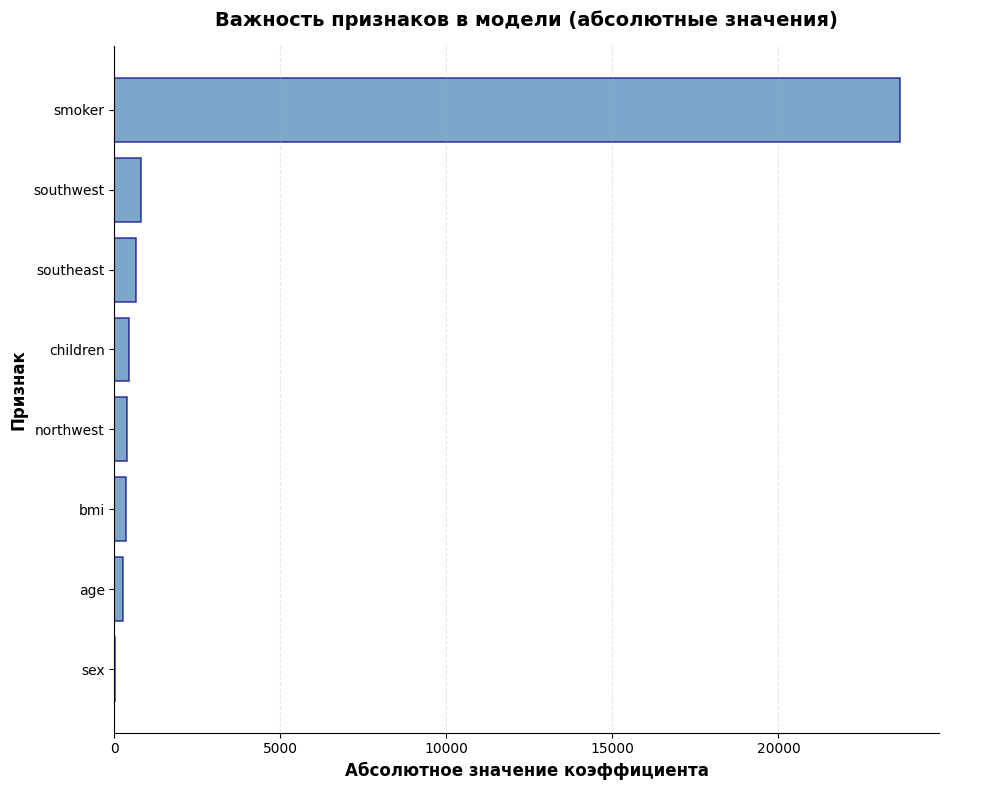

In [224]:
visualize_model_coefficients(w_analytical, X_train)

In [225]:
res_analytical = evaluate(w_analytical, X_train, y_train, X_test, y_test)
res_analytical

,MSE,RMSE,MAE,R2
Train,3.727768e+07,6105.545160,4208.234572,0.741726
Test,3.359692e+07,5796.284659,4181.194474,0.783593


#### Линейная регрессия c L2 регуляризацией

In [226]:
w_analytical_ridge, _ = linreg_analytical(X_train, y_train, l2=True, alpha=0.1)

Коэффициенты модели:
  Feature   Coefficient
Intercept -11931.219050
      age    256.975706
      sex    -18.591692
      bmi    337.092552
 children    425.278784
   smoker  23651.128856
northwest   -370.677326
southeast   -657.864297
southwest   -809.799354



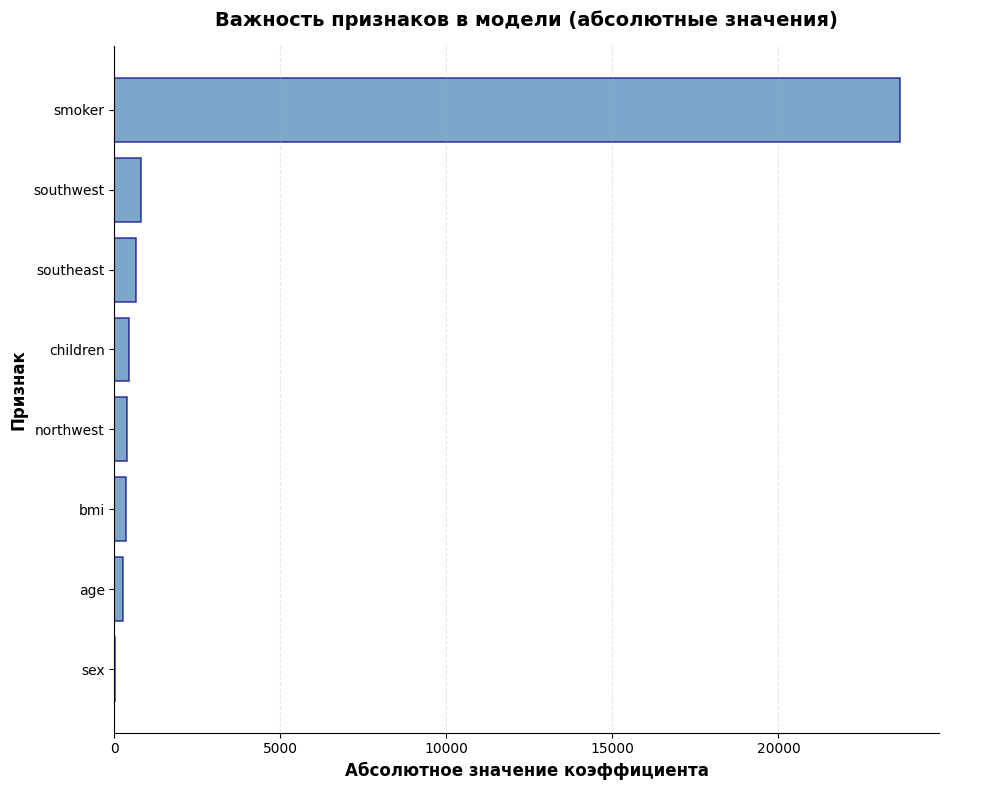

In [227]:
visualize_model_coefficients(w_analytical, X_train)

In [228]:
res_analytical_l2 = evaluate(w_analytical_ridge, X_train, y_train, X_test, y_test)
res_analytical_l2

,MSE,RMSE,MAE,R2
Train,3.727771e+07,6105.547646,4209.204825,0.741725
Test,3.360149e+07,5796.679210,4182.428134,0.783564


### Численное решение


Идея: двигаться в направлении, противоположном градиенту функции потерь.

**Формула обновления весов:**
$$w^{(k+1)} = w^{(k)} - \lambda \cdot \frac{\partial Q}{\partial w}|_{w=w^{(k)}}$$

где:
- $w^{(k)}$ — веса на итерации $k$
- $\lambda$ — learning rate (скорость обучения)
- $\frac{\partial Q}{\partial w}$ — градиент функции потерь

**Градиент для обычной регрессии:**
$$\frac{\partial Q}{\partial w} = 2X^T(Xw - y)$$

#### Градиентный спуск с L2 

Функционал потерь:
$$Q_{L_2}(w) = ||Xw - y||^2 + \alpha ||w||_2^2$$

Градиент:
$$\frac{\partial Q_{L_2}}{\partial w} = 2X^T(Xw - y) + 2\alpha w$$

Обновление весов:
$$w^{(k+1)} = w^{(k)} - \lambda \cdot [2X^T(Xw - y) + 2\alpha w]$$

#### Градиентный спуск с L1 

Функционал потерь:
$$Q_{L_1}(w) = ||Xw - y||^2 + \beta ||w||_1$$

Градиент:
$$\frac{\partial Q_{L_1}}{\partial w} = 2X^T(Xw - y) + \beta \cdot sign(w)$$

где $sign(w)$ — знаковая функция (возвращает -1, 0 или 1).

#### Параметры метода:

- **Learning rate** ($\lambda$): размер шага. Слишком большой → алгоритм может не сходиться, слишком маленький → медленная сходимость
- **Количество итераций**: когда остановить алгоритм (при достижении минимума, малом изменении loss или фиксированном числе итераций)

In [229]:
def gradient_linreg(X, y, l1=False, l2=False, alpha=0.01, learning_rate=0.01, 
                                n_iterations=1000, fit_intercept=True, 
                                save_loss_info=False, show_progress=False):
    X = np.array(X)
    y = np.array(y)
    
    n_samples = X.shape[0]

    if fit_intercept:
        X = np.column_stack([np.ones(n_samples), X])
    
    w = np.random.randn(X.shape[1]) * 0.01
    
    loss_history = []
    
    for iteration in range(n_iterations):
        y_pred = X @ w
        
        error = y_pred - y
        
        gradient = (2 / n_samples) * (X.T @ error)
        
        if l1:
            reg_gradient = alpha * np.sign(w)
            if fit_intercept:
                reg_gradient[0] = 0
            gradient += reg_gradient

        if l2:
            reg_gradient = 2 * alpha * w
            if fit_intercept:
                reg_gradient[0] = 0
            gradient += reg_gradient
        
        
        w = w - learning_rate * gradient
        
        mse = np.mean(error ** 2)
        loss = mse
        
        if l1:
            reg_loss = alpha * np.sum(np.abs(w[1:])) if fit_intercept else alpha * np.sum(np.abs(w))
            loss += reg_loss
            
        if l2:
            reg_loss = alpha * np.sum(w[1:] ** 2) if fit_intercept else alpha * np.sum(w ** 2)
            loss += reg_loss
        
        loss_history.append(loss)
        
        if show_progress and (iteration % 100 == 0 or iteration == n_iterations - 1):
            print(f"It-{iteration}: Loss={loss:.4f}, MSE={mse:.4f}")
    
    y_pred = X @ w
    
    results = [w]
    
    if save_loss_info:
        history = {
            'loss': loss_history,
            'final_loss': loss_history[-1]
        }
        results.append(history)
    
    return tuple(results)

In [230]:
def evaluate_with_scaling(w, X_train, y_train, X_test, y_test, 
                          X_scaler, y_scaler, fit_intercept=True):
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    
    y_pred_train_scaled = predict(X_train_scaled, w, fit_intercept=fit_intercept)
    y_pred_test_scaled = predict(X_test_scaled, w, fit_intercept=fit_intercept)
    
    y_pred_train = y_scaler.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).ravel()
    y_pred_test = y_scaler.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).ravel()
    
    metrics_train = get_metrics(y_train, y_pred_train)
    metrics_test = get_metrics(y_test, y_pred_test)
    
    results = pd.DataFrame({
        'Train': metrics_train,
        'Test': metrics_test
    }).T
    
    return results


In [231]:
def loss_plot(history, title):
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], linewidth=2)
    plt.xlabel('Итерация', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.yscale('log')
    plt.tight_layout()
    plt.show()
    print(f"Финальный loss: {history['final_loss']:.6f}")

Признаки имеют разные масштабы (например, `age`: 18-64, `charges`: 1121-63770), что вызывает проблемы при градиентном спуске:

- Признаки с большими значениями доминируют
- Градиент "вытягивается", сходимость медленная
- Learning rate сложно подобрать

StandardScaler преобразует признаки так, что среднее = 0, стандартное отклонение = 1.

После масштабирования все признаки в одинаковом масштабе, градиентный спуск сходится быстрее и стабильнее.


In [232]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).ravel()

In [233]:
w_gd, history_gd = gradient_linreg(
    X_train_scaled, y_train_scaled, 
    learning_rate=0.01,
    n_iterations=5000,
    save_loss_info=True,
    show_progress=True
)

w_gd_l2, history_gd_l2 = gradient_linreg(
    X_train_scaled, y_train_scaled,
    l2=True,
    alpha=0.1,
    learning_rate=0.01,
    n_iterations=5000,
    save_loss_info=True,
    show_progress=True
)

w_gd_l1, history_gd_l1 = gradient_linreg(
    X_train_scaled, y_train_scaled,
    l1=True,
    alpha=0.1,
    learning_rate=0.01,
    n_iterations=5000,
    save_loss_info=True,
    show_progress=True
)

It-0: Loss=0.9738, MSE=0.9738
It-100: Loss=0.2727, MSE=0.2727
It-200: Loss=0.2586, MSE=0.2586
It-300: Loss=0.2583, MSE=0.2583
It-400: Loss=0.2583, MSE=0.2583
It-500: Loss=0.2583, MSE=0.2583
It-600: Loss=0.2583, MSE=0.2583
It-700: Loss=0.2583, MSE=0.2583
It-800: Loss=0.2583, MSE=0.2583
It-900: Loss=0.2583, MSE=0.2583
It-1000: Loss=0.2583, MSE=0.2583
It-1100: Loss=0.2583, MSE=0.2583
It-1200: Loss=0.2583, MSE=0.2583
It-1300: Loss=0.2583, MSE=0.2583
It-1400: Loss=0.2583, MSE=0.2583
It-1500: Loss=0.2583, MSE=0.2583
It-1600: Loss=0.2583, MSE=0.2583
It-1700: Loss=0.2583, MSE=0.2583
It-1800: Loss=0.2583, MSE=0.2583
It-1900: Loss=0.2583, MSE=0.2583
It-2000: Loss=0.2583, MSE=0.2583
It-2100: Loss=0.2583, MSE=0.2583
It-2200: Loss=0.2583, MSE=0.2583
It-2300: Loss=0.2583, MSE=0.2583
It-2400: Loss=0.2583, MSE=0.2583
It-2500: Loss=0.2583, MSE=0.2583
It-2600: Loss=0.2583, MSE=0.2583
It-2700: Loss=0.2583, MSE=0.2583
It-2800: Loss=0.2583, MSE=0.2583
It-2900: Loss=0.2583, MSE=0.2583
It-3000: Loss=0.2583, 

#### Линейная регрессия

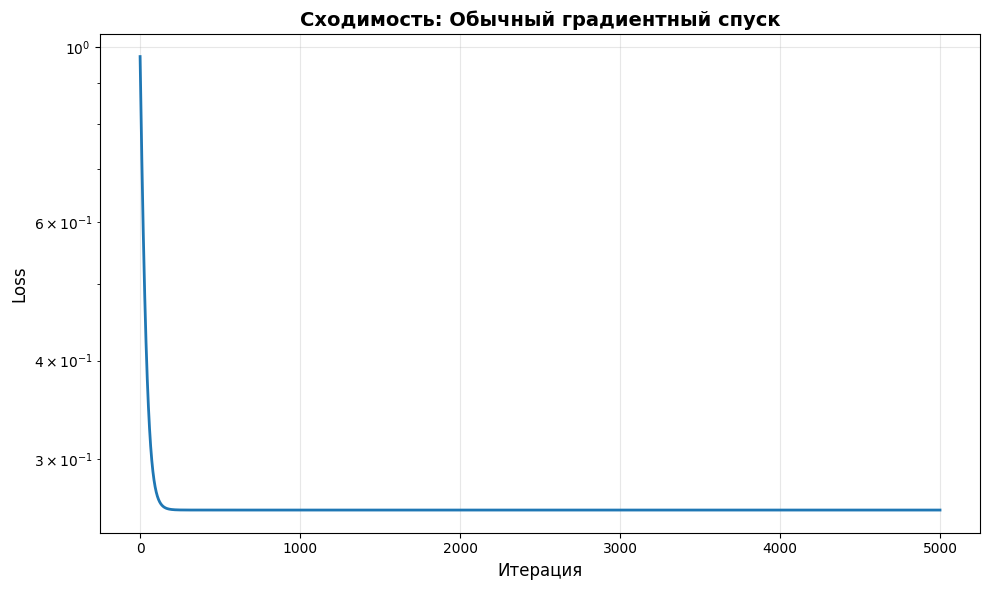

Финальный loss: 0.258274


In [234]:
loss_plot(history_gd, title="Сходимость: Обычный градиентный спуск")

In [235]:
res_gd = evaluate_with_scaling(w_gd, X_train, y_train, X_test, y_test, scaler, y_scaler)
res_gd

,MSE,RMSE,MAE,R2
Train,3.727768e+07,6105.545160,4208.234572,0.741726
Test,3.359692e+07,5796.284659,4181.194474,0.783593


#### Линейная регрессия + L2

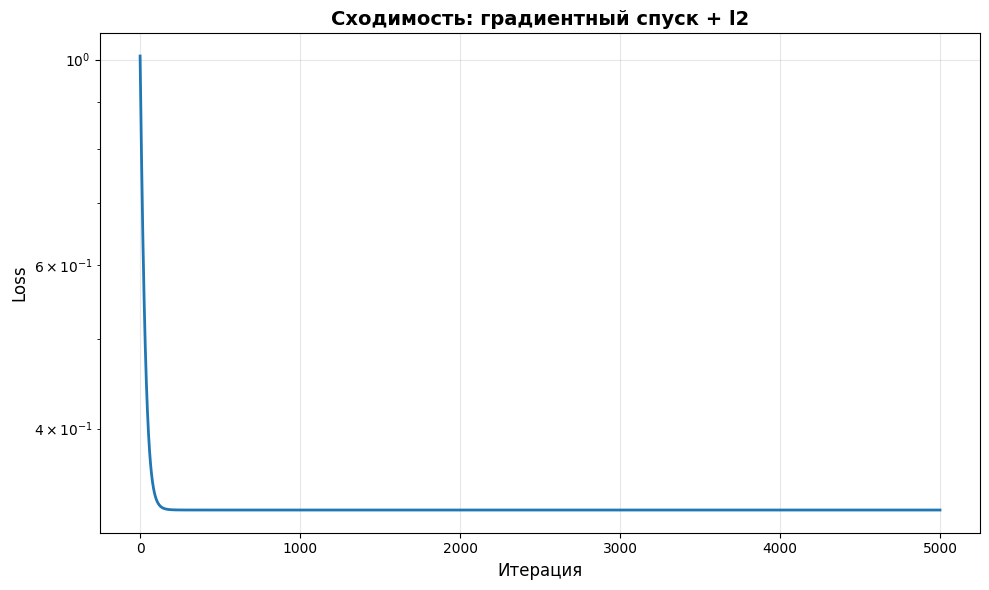

Финальный loss: 0.326751


In [236]:
loss_plot(history_gd_l2, title="Сходимость: градиентный спуск + l2")

In [237]:
res_gd_l2 = evaluate_with_scaling(w_gd_l2, X_train, y_train, X_test, y_test, scaler, y_scaler)
res_gd_l2

,MSE,RMSE,MAE,R2
Train,3.820395e+07,6180.934386,4361.728269,0.735308
Test,3.533400e+07,5944.240643,4378.647501,0.772404


#### Линейная регрессия + L1

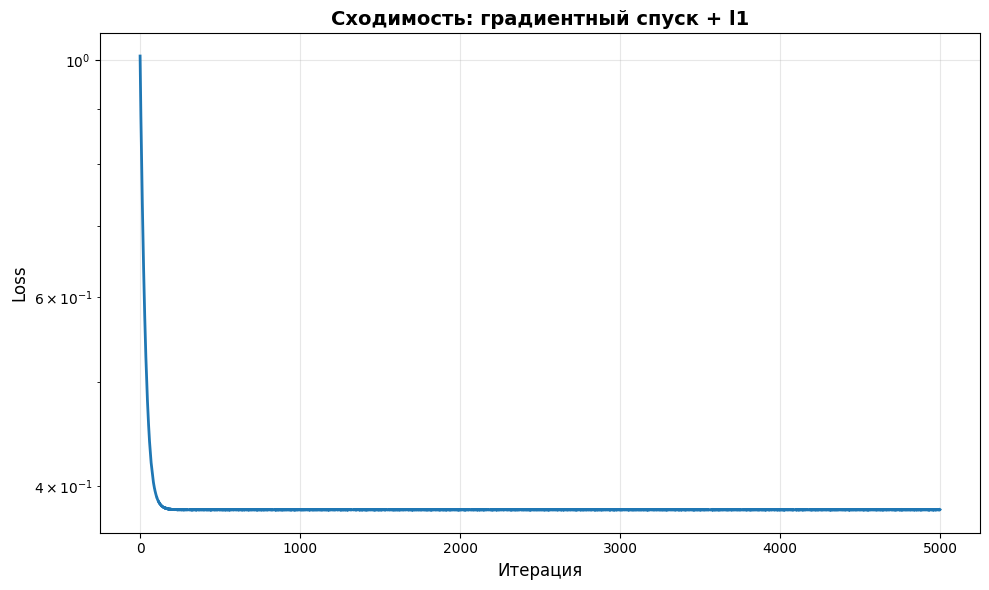

Финальный loss: 0.380288


In [238]:
loss_plot(history_gd_l1, title="Сходимость: градиентный спуск + l1")

In [239]:
res_gd_l1 = evaluate_with_scaling(w_gd_l1, X_train, y_train, X_test, y_test, scaler, y_scaler)
res_gd_l1

,MSE,RMSE,MAE,R2
Train,3.867142e+07,6218.634624,4313.033391,0.732069
Test,3.590934e+07,5992.440206,4310.108169,0.768698


### Предсказание средним

In [240]:
def evaluate_mean(y_train, y_test):
    mean_value = np.mean(y_train)
    
    y_pred_train = np.full_like(y_train, mean_value, dtype=float)
    y_pred_test = np.full_like(y_test, mean_value, dtype=float)
    
    metrics_train = get_metrics(y_train, y_pred_train)
    metrics_test = get_metrics(y_test, y_pred_test)
    
    results = pd.DataFrame({
        'Train': metrics_train,
        'Test': metrics_test
    }).T
    
    return results

In [241]:
res_mean = evaluate_mean(y_train, y_test)

print(f"\nПредсказание средним: {np.mean(y_train):.2f}")
res_mean


Предсказание средним: 13346.09


,MSE,RMSE,MAE,R2
Train,1.443336e+08,12013.892872,9000.556130,0.000000
Test,1.553914e+08,12465.610442,9593.338461,-0.000919


## Задание 4

### Сравнение метрик для test

In [250]:
metrics_table = pd.DataFrame({
    'Mean': res_mean.loc['Test'],
    'Analytical': res_analytical.loc['Test'],
    'Analytical L2': res_analytical_l2.loc['Test'],
    'Gradient Descent': res_gd.loc['Test'],
    'Gradient Descent L2': res_gd_l2.loc['Test'],
    'Gradient Descent L1': res_gd_l1.loc['Test'],
}).T

print(metrics_table)

print("\n" + "="*60)
print("ЛУЧШИЕ РЕЗУЛЬТАТЫ")
print("="*60)

for metric in ['MSE', 'RMSE', 'MAE']:
    if metric in metrics_table.columns:
        best = metrics_table[metric].idxmin()
        print(f"{metric}: {best} ({metrics_table[metric].min():.4f})")

for metric in ['R2', 'Adjusted_R2']:
    if metric in metrics_table.columns:
        best = metrics_table[metric].idxmax()
        print(f"{metric}: {best} ({metrics_table[metric].max():.4f})")

print("\n" + "="*60)
wins = {}
for metric in ['MSE', 'RMSE', 'MAE', 'R2', 'Adjusted_R2']:
    if metric in metrics_table.columns:
        if metric in ['R2', 'Adjusted_R2']:
            best = metrics_table[metric].idxmax()
        else:
            best = metrics_table[metric].idxmin()
        wins[best] = wins.get(best, 0) + 1

best_method = max(wins, key=wins.get)
print(f"ИТОГ: Лучший метод - {best_method} ({wins[best_method]} лучших метрик)")
print("="*60)

                              MSE          RMSE          MAE        R2
Mean                 1.553914e+08  12465.610442  9593.338461 -0.000919
Analytical           3.359692e+07   5796.284659  4181.194474  0.783593
Analytical L2        3.360149e+07   5796.679210  4182.428134  0.783564
Gradient Descent     3.359692e+07   5796.284659  4181.194474  0.783593
Gradient Descent L2  3.533400e+07   5944.240643  4378.647501  0.772404
Gradient Descent L1  3.590934e+07   5992.440206  4310.108169  0.768698

ЛУЧШИЕ РЕЗУЛЬТАТЫ
MSE: Gradient Descent (33596915.8514)
RMSE: Gradient Descent (5796.2847)
MAE: Gradient Descent (4181.1945)
R2: Gradient Descent (0.7836)

ИТОГ: Лучший метод - Gradient Descent (4 лучших метрик)


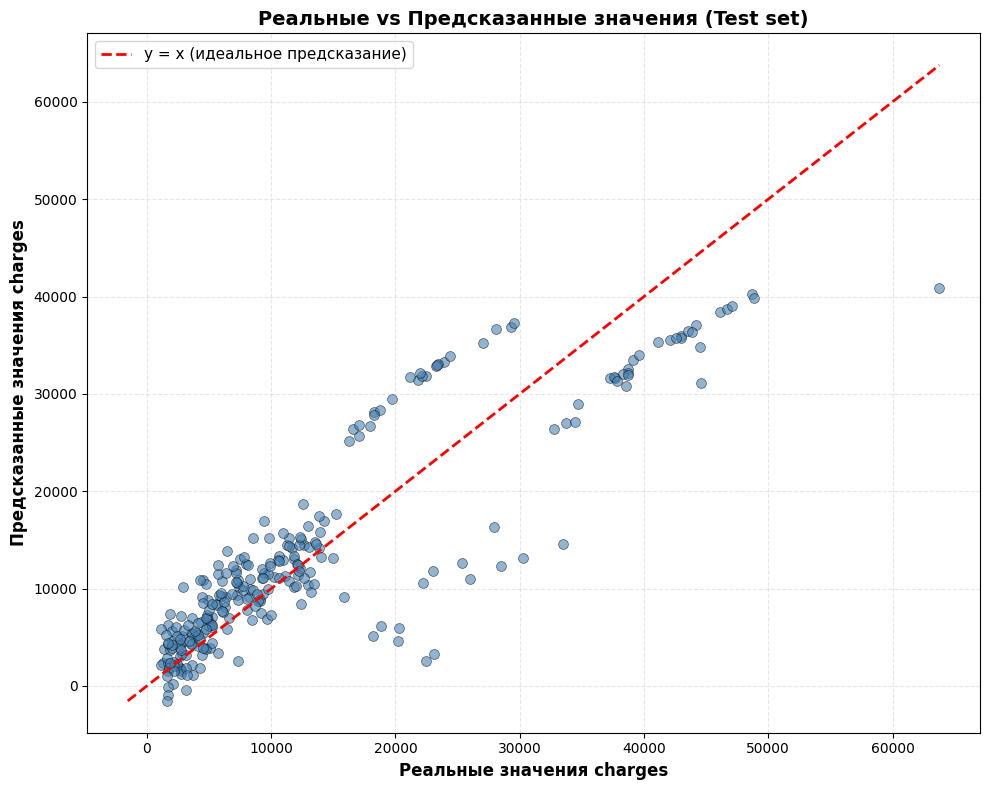

In [ ]:
y_pred_test = predict(X_test, w_analytical)

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_test, alpha=0.6, s=50, color='steelblue', edgecolors='black', linewidth=0.5)

min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='y = x (идеальное предсказание)')

plt.xlabel('Реальные значения charges', fontsize=12, fontweight='bold')
plt.ylabel('Предсказанные значения charges', fontsize=12, fontweight='bold')
plt.title('Реальные vs Предсказанные значения (Test set)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()